# Vodafone Music Challenge

*Задано набір даних з інформацією про абонентів Vodafone*

**Задача:** дослідити дані, зробити розвідувальний аналіз, вирішити задачу класифікації - побудувати модель, яка передбачає хто із абонентів може стати користувачем Vodafone Music.

### Data Understanding (розуміння даних)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Імпортуємо дані

In [82]:
path = "D:\Лиля\Data Science\Pyton\Д_З\My Д_з\Фінальний проект/vodafone_music_subset.csv"
df = pd.read_csv(path)

#### Копіюємо date frame
Копіювання датафрейму може стати в нагоді в ситуаціях, коли потрібно внести в дані зміни, але при цьому треба і зберегти оригінал

In [83]:
df_copy = df.copy()

#### Переглянемо дані 

In [84]:
df.shape

(17500, 460)

In [85]:
#дані з початку датафрейму
df.head(10)

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
0,7,1057,3,2.0,0,0.965306,0,153.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,48.779990,NaN,0
1,7,728,3,1.0,0,0.964468,0,354.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2,7,896,26,1.0,0,0.646706,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
3,7,745,3,2.0,0,0.842123,0,252.0,1.0,22.0,...,0.0,0.0,0.0,0.0,NaN,NaN,3104.715068,2890.028280,NaN,1
4,7,69,27,1.0,1,0.988695,0,333.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.822502,41.871067,NaN,0
5,7,1057,3,1.0,0,0.667188,0,358.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,25413.202024,3780.768517,NaN,0
6,7,745,3,2.0,0,0.657412,0,342.0,1.0,446.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
7,4,896,16,2.0,0,0.738275,0,323.0,1.0,967.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
8,7,1756,3,2.0,1,0.842379,0,340.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,10.773636,NaN,NaN,0
9,7,1057,3,2.0,0,0.902345,0,340.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,261.105720,NaN,NaN,0


In [86]:
#дані з кінця датафрейму
df.tail(2)

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
17498,7,955,3,2.0,0,0.961802,0,346.0,1.0,360.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
17499,7,812,3,2.0,0,0.478681,0,358.0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,5.009843,5650.923918,11.365452,NaN,0


Бачимо, що датафрейм має 460 стовпців

#### Відомості про типи даних стовпців
Для цього спочатку перевіримо параметри коннфігурації для відображення кількості колонок

In [8]:
pd.options.display.max_info_columns 

100

Встановимо параметр для 460

In [9]:
pd.options.display.max_info_columns = 460
pd.options.display.max_info_columns

460

Отримаємо відомості про датафрейм (назви колонок, тип даних, кількість ненульових)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 460 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17500 non-null  int64  
 1    manufacturer_category                17500 non-null  int64  
 2    os_category                          17500 non-null  int64  
 3    sim_count                            17324 non-null  float64
 4    tp_flag                              17500 non-null  int64  
 5    lt                                   17500 non-null  float64
 6    block_flag                           17500 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_2_flag                       17498 non-null  float64
 11   service_3_fla

Бачимо, що кількість записів - 17500, усі колонки мають тип int або float, є колонки з пропущеними значеннями

#### Опис даних

Дані поділяються на три типи: характеристики абонента на певний час (дата скорингу), деякі статистики за попередній місяць і помісячні агрегати. Агрегати розраховані як сума/кількість подій у попередньому місяці від дати скорингу (назви колонок мають суфікс m1), за позаминулий місяць (m2) та за третій місяць (m3).

Усі змінні у вибірці поділяються на тематичні категорії:
    
* **Device characteristics** – інформація про пристрій абонента:

device_type - *тип девайсу (7 категорій)*

manufacturer_category - *категорія виробника пристрою (292 унікальних)*

os_category - *категорія операційної системи (14 категорій)*

sim_count - *кількість sim-карт в пристрої (3 унікальних + пропущені значення)*

* **General characteristics** - інформація про абонента на момент дати скорингу:

tp_flag - *належність до спеціального тарифного плану (бінарна змінна)*

lt -  *тривалість життя клієнта (0<lt<1)*

block_flag - *стан блокування (бінарна змінна)*

days_exp - *кількість днів до завершення (є 2 пропущені значення, є від'ємні)*

service_1_flag - *користування сервісом_1 (бінарна змінна + 2 пропущені)*

service_1_count - *кількість використань сервісу_1 (2 пропущені)*

service_2_flag - *користування сервісом_2 (бінарна змінна: 0 - 0, 1 - 17498 + пропущені)*

service_3_flag - *користування сервісом_3 (бінарна змінна + пропущені)*

is_obl_center - *належність абонента обласному центру (бінарна змінна)*

is_my_vf - *реєстрація особистого кабінету (бінарна змінна)*

* **User activity features** - особливості активності користувача:

balance_sum - *стан балансу на день скорингу (+ пропущені)*

paym_last_days - *кількість днів після останнього платежу (+ пропущені)*

inact_days_count - *кількість неактивних днів (17498 значень = 21457.0 + пропущені)*

* **SMS from Services** - кількість вхідних смс від різних сервісів за минулий місяць.

count_sms_source_1, ... count_sms_source_16 - *кількість sms з ресурсів 1-16(всі колонки мають 15484 непропущених значень)*

* **Interests Data** - кількість відвідуваних сайтів певної категорії, а також використання деяких додатків (к-ть заходів і к-ть переданих байт) за минулий місяць.

count_url_category_1, ...count_url_category_15 -*кількість відвідуваних веб-сайтів у категоріях 1-15 (+ пропущені)*

vol_app_1, ... vol_app_16 - *кількість байтів, використаних при відвідуванні певних сайтів та додатків 1-16 (+ пропущені)*

count_app_1, ... count_app_16 - *кількість входжень на певні сайти та додатки 1-16 (+ пропущені)*

rr_act_type_1, ... rr_act_type_8 - *коефіцієнт відповіді на активність типу 1-8(+ пропущені)*

count_act_type_1, ...count_act_type_8 - *кількість sms по активності типу 1-8 (+ пропущені)*

* **Previous Campaigns Results** - участь абонента в акціях від оператора різного типу (за півроку)

rr_gift_type_1, ...rr_gift_type_4 - *(+ пропущені)*

count_gift_type_1, ... count_gift_type_4 - *кількість подарунків типу 1-4 (+ пропущені)*

В наступних колонках міститься інформація за кожен з місяців m1, m2, m3:

* **All costs** - інформація, пов’язана зі списанням коштів з абонента за місяць. Загальний рахунок(в домашній мережі, в роумінгу), списки за смс, списки на абонентську плату.
* **Recharge Statistics** - інформація про поповнення рахунку за місяць (сума, кількість поповнень різними способами).
* **Voice costs** - інформація про списання за дзвінки (всередині мережі, у мережі конкурентів, у румінгу та ін.) за місяць.
* **Voice duration** - інформація про загальну тривалість дзвінків різних типів за місяць.
* **Network Action Stats** - кількість мережевих подій за місяць.
* **Other Essential Features** - статистика користування іншими сервісами, в тому числі дата-трафіком за місяць.

**Тarget**

target - *бінарна змінна:*

**1** – користувачі, які протягом місяця від скорингу вперше встановили та оплатили перший місяць користування додатком Vodafone Music.

**0** – користувачі, які ніколи не користувалися Vodafone Music, а також не встановлювали його протягом місяця від дати скорингу, але характеристики їх пристроїв дозволяють їм користуватися цим додатком.


### Data Cleaning (очистка даних)

Переглянемо кількість sim-карт в пристроях користувачів

In [88]:
df['sim_count'].value_counts(dropna=False)

2.0    10495
1.0     6818
NaN      176
3.0       11
Name: sim_count, dtype: int64

In [89]:
df['sim_count'].isnull().sum()

176

In [90]:
df['sim_count'].median()

2.0

Медіанне значення кількості sim-карти - 2. Замінимо пропущені 178 значень медіанним значенням

In [91]:
df['sim_count'] = df['sim_count'].fillna(2)

In [92]:
df['sim_count'].value_counts(dropna=False)

2.0    10671
1.0     6818
3.0       11
Name: sim_count, dtype: int64

Переглянемо вміст колонки days_exp (днів до завершення)

In [93]:
df['days_exp'].value_counts(dropna=False)

 363.0    668
 364.0    581
 362.0    575
 359.0    531
 360.0    523
         ... 
 641.0      1
-68.0       1
-23.0       1
-67.0       1
-54.0       1
Name: days_exp, Length: 429, dtype: int64

In [94]:
df[df['days_exp']<0]

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
37,7,404,3,2.0,0,0.483409,1,-7.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.044461,NaN,1
278,7,84,3,2.0,0,0.531636,1,-46.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,300.136147,0.456204,NaN,0
311,8,868,3,1.0,0,0.823458,1,-47.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,96.359090,4.543664,NaN,0
315,1,1,1,2.0,0,0.511896,1,-28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.658774,0.933676,NaN,NaN,0
327,7,1756,3,2.0,0,0.805674,1,-19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,7,1057,3,2.0,0,0.941987,1,-34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.000977,NaN,NaN,0
17191,7,1057,3,2.0,0,0.534615,1,-49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,920.253095,34.644444,NaN,0
17348,7,1057,3,2.0,0,0.951751,1,-26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,36.115536,NaN,0
17426,7,593,3,1.0,0,0.461312,1,-24.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Колонка days_exp має 140 від'ємних значень

Переглянемо пропущені значення колонки days_exp

In [95]:
df[df['days_exp'].isnull()]

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
10432,7,1756,3,2.0,0,0.362673,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12873,7,1057,3,1.0,0,0.888318,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.596597,0.203785,1.0,0


Пропущені значення days_exp мають 2 абоненти з індексами 10432 і 12873. Переглянемо кількість пропущених значень в цих рядках

In [96]:
df.iloc[[10432, 12873]].isnull().sum(axis=1)

10432    421
12873    409
dtype: int64

Переглянемо відсоток пропущених значень в цих рядках

In [97]:
(df.iloc[[10432, 12873]].isnull().sum(axis=1)/len(df.columns)* 100).round(0)

10432    92.0
12873    89.0
dtype: float64

Оскільки відсоток пропущених значень в цих рядках великий (92% і 89%), робимо висновок, що дані в цих рядках мало інформативні і видалимо їх

In [98]:
df = df.drop([10432, 12873])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 460 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_2_flag                       17498 non-null  float64
 11   service_3_fla

Переглянемо дані колонки service_1_flag

In [100]:
df['service_1_flag'].value_counts(dropna=False)

0.0    10139
1.0     7359
Name: service_1_flag, dtype: int64

Колонка service_1_flag містить бінарні значення, пропущених вже немає

Переглянемо дані колонки service_2_flag

In [101]:
df['service_2_flag'].value_counts(dropna=False)

1.0    17498
Name: service_2_flag, dtype: int64

Колонка service_2_flag містить всі **однакокові значення 1**, пропущених немає.

Видалимо цю колонку для зменшення розмірності датасету.

In [102]:
df = df.drop(['service_2_flag'], axis=1)

Переглянемо дані колонки paym_last_days (кількість днів від дати останнього платежу)

In [103]:
df['paym_last_days'].value_counts()

21457.0    2261
2.0         657
0.0         599
3.0         589
1.0         552
           ... 
70.0         20
78.0         19
84.0         18
80.0         17
85.0         16
Name: paym_last_days, Length: 92, dtype: int64

Знайдемо кількість пропущених значень колонки paym_last_days

In [104]:
df['paym_last_days'].isnull().sum()

202

Знайдемо медіанне значення paym_last_days

In [105]:
df['paym_last_days'].median()

18.0

Замінимо пропущені значення колонки paym_last_days медіанним значенням 18

In [106]:
df['paym_last_days'] = df['paym_last_days'].fillna(18)

Переглянемо дані колонки inact_days_count

In [107]:
df['inact_days_count'].value_counts(dropna=False)

21457.0    17498
Name: inact_days_count, dtype: int64

Колонка inact_days_count містить всі **однакокові значення 21457**, пропущених немає.

Видалимо цю колонку для зменшення розмірності датасету.

In [108]:
df = df.drop(['inact_days_count'], axis=1)

Переглянемо оновлену інформацію про датасет

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 458 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

Переглянемо вміст колонок 17-32 (count_sms_source_1,...,count_sms_source_16) - кількість sms з різних ресурсів

In [109]:
df['count_sms_source_1'].value_counts(dropna=False)

0.0     15438
NaN      2016
1.0        26
2.0        10
3.0         4
4.0         2
9.0         1
30.0        1
Name: count_sms_source_1, dtype: int64

In [110]:
#знайдемо медіану count_sms_source_1
df['count_sms_source_1'].median()

0.0

Дослідивши наступні колонки від *count_sms_source_2* до *count_sms_source_16*, отримали такий самий результат: **2016** пропущених значень, медіана **0**. Тому, можемо заповнити пропущені значення медіанним. 

In [111]:
df.columns[17:33]

Index(['count_sms_source_3', 'count_sms_source_4', 'count_sms_source_5',
       'count_sms_source_6', 'count_sms_source_7', 'count_sms_source_8',
       'count_sms_source_9', 'count_sms_source_10', 'count_sms_source_11',
       'count_sms_source_12', 'count_sms_source_13', 'count_sms_source_14',
       'count_sms_source_15', 'count_sms_source_16', 'count_url_category_1',
       'count_url_category_2'],
      dtype='object')

In [112]:
list_index_count_sms_source = []
for i in range(1,17):
    list_index_count_sms_source.append('count_sms_source_'+str(i))

In [113]:
for i in list_index_count_sms_source:
    df[i] = df[i].fillna(0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 458 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

Переглянемо вміст колонок 33-45 (count_url_category_1,..., count_url_category_15) - кількість відвідуваних веб-сайтів у категоріях 1-15

In [114]:
df['count_url_category_1'].value_counts(dropna=False)

NaN       17014
1.0          51
2.0          34
4.0          19
3.0          16
          ...  
220.0         1
828.0         1
69.0          1
84.0          1
1281.0        1
Name: count_url_category_1, Length: 228, dtype: int64

In [115]:
df[df['count_url_category_1']==0]  

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target


Кількість пропущених - **17014**. Також бачимо, що в переліку відсутнє значення **0**, тобто не позначені абоненти, які жодного разу не відвідували даний сайт. Можемо зробити висновок, що пропущені значення і є такими абонентами. Аналогічна ситуація виявилася при перегляді інших колонок цієї серії. Тому замінимо пропущені значення в цих колонках на **0**.

In [116]:
df.columns[33:46]

Index(['count_url_category_3', 'count_url_category_4', 'count_url_category_6',
       'count_url_category_7', 'count_url_category_8', 'count_url_category_9',
       'count_url_category_10', 'count_url_category_11',
       'count_url_category_12', 'count_url_category_13',
       'count_url_category_15', 'vol_app_1', 'vol_app_2'],
      dtype='object')

In [117]:
list_index_count_url_category = df.columns[33:46]
list_index_count_url_category

Index(['count_url_category_3', 'count_url_category_4', 'count_url_category_6',
       'count_url_category_7', 'count_url_category_8', 'count_url_category_9',
       'count_url_category_10', 'count_url_category_11',
       'count_url_category_12', 'count_url_category_13',
       'count_url_category_15', 'vol_app_1', 'vol_app_2'],
      dtype='object')

In [118]:
for i in list_index_count_url_category:
    df[i] = df[i].fillna(0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 458 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

В колонках 46-61 (vol_app_1 - 16) міститься інформація про кількість використаних байтів абонентом в різних соціальних мережах і месенджерах. Відповідно, в колонках 62-77 (count_app_1 - 16) інформація про кількість входжень на даний сайт. Дані колонки не містять 0-вих значень, але кількість порожніх у кожній парі однакова. Перевіримо, чи співпадають ці порожні значення для пари vol_app_1 і count_app_1.

In [119]:
df[df['vol_app_1']==0]

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
2,7,896,26,1.0,0,0.646706,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
6,7,745,3,2.0,0,0.657412,0,342.0,1.0,446.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
7,4,896,16,2.0,0,0.738275,0,323.0,1.0,967.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
12,7,1756,3,2.0,0,0.901782,0,317.0,1.0,122.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.012695,NaN,0
17,4,1057,28,2.0,0,0.640373,0,203.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.7843,NaN,137.503228,3.034820,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17488,7,593,3,1.0,0,0.676183,0,127.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,31.947295,6.837026,NaN,1
17492,4,896,28,1.0,0,0.563798,0,304.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,21.622738,NaN,0
17493,7,1057,3,2.0,0,0.390487,0,339.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
17496,7,896,20,1.0,0,0.951170,0,325.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000366,NaN,0


In [120]:
df['vol_app_1'].isnull().value_counts(dropna=False)

False    17498
Name: vol_app_1, dtype: int64

In [121]:
df['count_app_1'].isnull().value_counts(dropna=False)

False    12204
True      5294
Name: count_app_1, dtype: int64

In [122]:
df.loc[df['vol_app_1'].isnull(),'count_app_1'].value_counts(dropna=False)

Series([], Name: count_app_1, dtype: int64)

Бачимо, що дані колонки містять по 12204 NaN і ці пропущені значення збігаються для відповідних абонентів. Можемо зробити висновок, що у цих пропущених значеннях повинна зберігатися інформація про невикористання сервісу абонентом. Тобто 0.

Така ситуація прослідковується для кожної пари vol_app і count_app.

Аналогічну картину маємо для пар rr_act_type і count_act_type, rr_gift_type і count_gift_type. 

Отже, в колонках 46-101 можемо заповнити пропущені значення нулями.

В наступних колонках 102-458 міститься інформація по кожному з 3-х місяців m1, m2, m3: 
* **All costs** - інформація, пов’язана зі списанням коштів з абонента за місяць. Загальний рахунок(в домашній мережі, в роумінгу), списки за смс, списки на абонентську плату.
* **Recharge Statistics** - інформація про поповнення рахунку за місяць (сума, кількість поповнень різними способами).
* **Voice costs** - інформація про списання за дзвінки (всередині мережі, у мережі конкурентів, у румінгу та ін.) за місяць.
* **Voice duration** - інформація про загальну тривалість дзвінків різних типів за місяць.
* **Network Action Stats** - кількість мережевих подій за місяць.
* **Other Essential Features** - статистика користування іншими сервісами, в тому числі дата-трафіком за місяць.

Дані в колонках 102-458 або не мають значення 0, або, якщо значення 0 присутнє, то воно є медіанним. Тому, робимо висновок, що усі пропущені дані в цих колонках також можна заповнити нульовими. 

Отже, заповнимо усі NaN що залишилися значенням 0. 

In [123]:
df = df.fillna(0)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 458 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

Переглянемо, чиє колонки повністю заповнені нульовими значеннями

In [125]:
col_0 = df.loc[:,(df==0).all()]
col_0.shape

(17498, 14)

Маємо 14 колонок заповнених тільки 0-ми значеннями. Видалимо їх

In [126]:
df = df.drop(col_0, axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 444 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

### Exploratory Data Analysis (розвідувальний аналіз) 

Описова статистика колонок

In [127]:
df.describe()

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
count,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,...,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000,17498.000000
mean,6.527432,889.561264,7.707967,1.611041,0.082295,0.791322,0.026403,317.100297,0.420562,249.294662,...,26.786604,0.048005,0.302390,0.058635,2.434808,258.046000,1751.518598,249.504774,0.052177,0.076580
std,1.205693,492.082132,9.555156,0.488816,0.274822,0.155691,0.160335,80.530500,0.493663,445.107595,...,59.397327,0.330541,2.237806,0.383389,45.864103,2020.111084,5156.879049,823.354852,0.222391,0.265932
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.201879,0.000000,-87.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,592.000000,3.000000,1.000000,0.000000,0.701157,0.000000,324.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,896.000000,3.000000,2.000000,0.000000,0.834245,0.000000,345.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.056746,9.323184,0.000000,0.000000
75%,7.000000,1057.000000,3.000000,2.000000,0.000000,0.919868,0.000000,356.000000,1.000000,387.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1149.529803,147.018162,0.000000,0.000000
max,8.000000,1836.000000,28.000000,3.000000,1.000000,1.000000,1.000000,824.000000,1.000000,10760.000000,...,2265.000000,19.000000,68.385400,4.000000,5925.716500,68556.908527,107707.651547,25739.826267,1.000000,1.000000


Перевіримо кореляцію між колонками методом Спірмена

In [54]:
corr =df.corr(method='spearman')
print(corr)

                       device_type  manufacturer_category  os_category  \
device_type               1.000000               0.022024    -0.198810   
manufacturer_category     0.022024               1.000000    -0.207739   
os_category              -0.198810              -0.207739     1.000000   
sim_count                 0.131542               0.262025    -0.263634   
tp_flag                   0.015143               0.009178    -0.001444   
...                            ...                    ...          ...   
data_type_1_m3            0.107990               0.078994    -0.025324   
data_type_2_m3            0.292100              -0.025151    -0.018968   
data_type_3_m3            0.206869              -0.033001    -0.002004   
service_9_flag_m3        -0.041378              -0.030376     0.019247   
target                    0.032816               0.002911    -0.028282   

                       sim_count   tp_flag        lt  block_flag  days_exp  \
device_type             0.131542 

Візуалізуємо кореляційну матрицю датафрейму у вигляді теплової карти

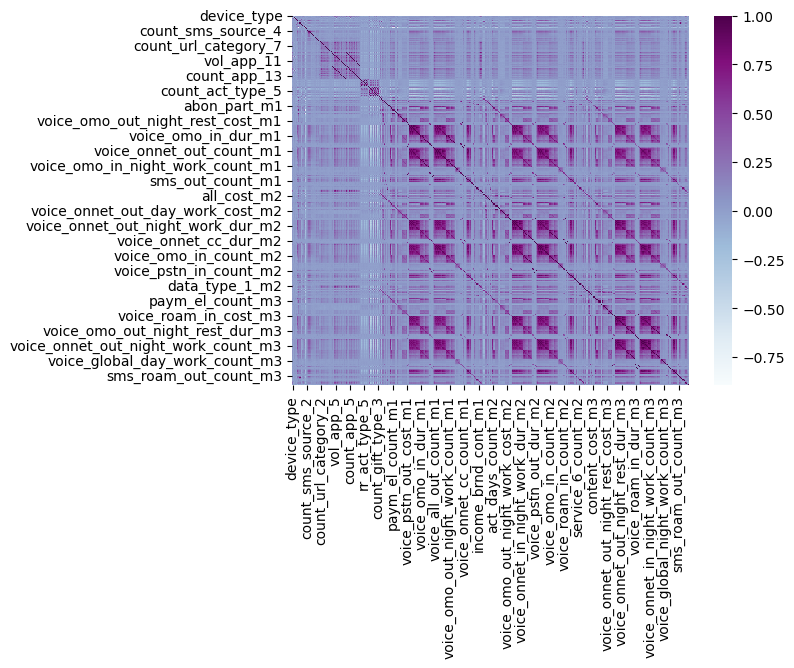

In [55]:
sns.heatmap(corr, cmap='BuPu')
plt.show()

На тепловій карті відмічаємо додатню кореляцію між фічами в середині груп m1, m2, m3, а саме між різними видами voice, sms. А також існує додатня кореляція між групами m1, m2, m3.

Візуалізуємо кореляцію фіч відносно target

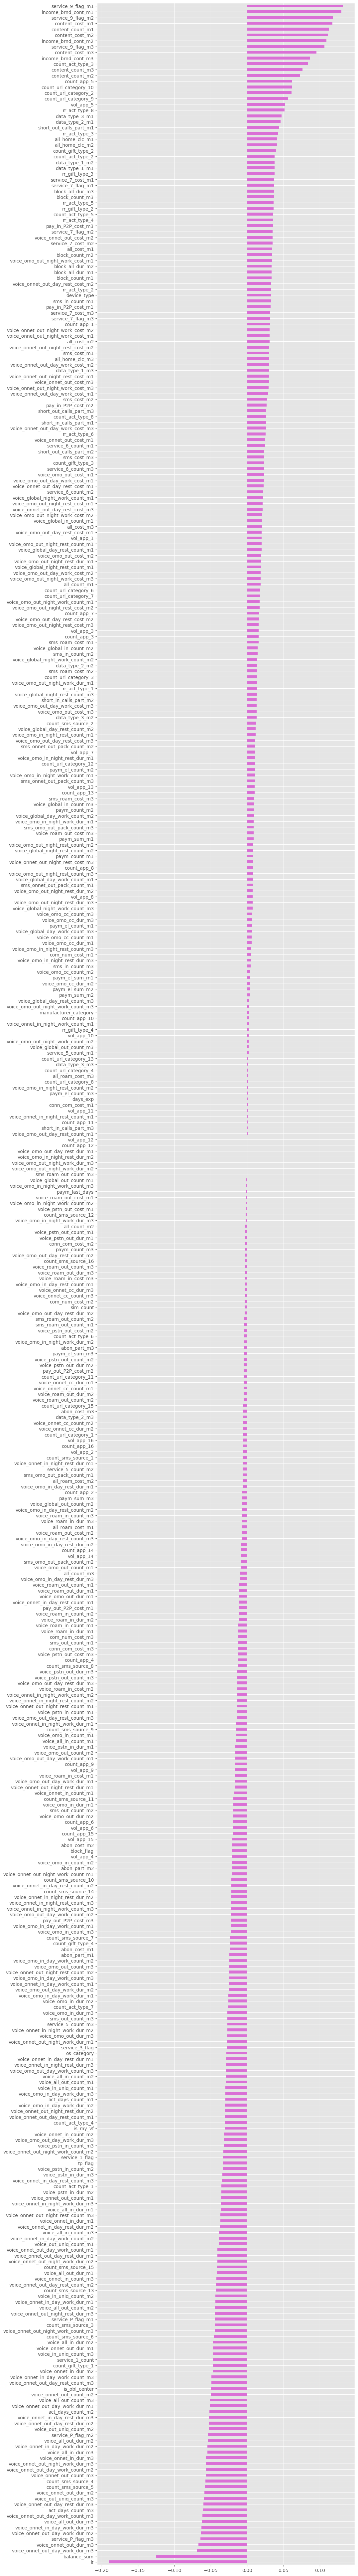

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 100))
corr['target'][0:-1].sort_values().plot(kind='barh', color='orchid')
plt.show()

Відмічаємо додатню кореляцію змінної target з income_brnd_cont_m1-m3 (дохід по вмісту бренду за кожен з 3-х місяців), service_9_flag_m1-m3 (підключення сервісу 9 за кожен з 3-х місяців), content_count_m1-m3 (кількість контенту при використанні інших сервісів за кожен з 3-х місяців) та content_cost_m1-m3 (вартість контенту помісячно). Але кореляціє не є великою за значенням: від 0,1 до 0,2.

Також відмічаємо від'ємну кореляцію змінної target з lt (тривалість життя клієнта) та balans_sum (сема залишку балансу на початок місяця).

Розглянемо абонентів, у яких target=1

In [57]:
df[df['target']==1]

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
3,7,745,3,2.0,0,0.842123,0,252.0,1.0,22.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,3104.715068,2890.028280,0.0,1
37,7,404,3,2.0,0,0.483409,1,-7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.044461,0.0,1
38,7,1057,3,2.0,0,0.695604,0,347.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,1004.772091,538.148567,0.0,1
60,7,896,3,1.0,0,0.870567,0,345.0,1.0,419.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,824.366839,1575.686106,0.0,1
65,7,1057,3,2.0,0,0.508241,0,339.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.7058,0.0,399.044860,32.632910,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17456,4,896,28,1.0,0,0.786135,0,350.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.2352,0.0,0.000000,364.238356,0.0,1
17457,7,626,3,1.0,0,0.563798,0,222.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,311.733679,1.468999,0.0,1
17459,7,745,3,2.0,0,0.670756,0,348.0,1.0,310.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,1
17482,7,1057,3,2.0,0,0.884300,0,62.0,1.0,310.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,1893.862258,82.543036,0.0,1


In [128]:
len(df[df['target']==1])

1340

Кількість абонентів, які підключили додаток Vodafone Music становить 1340

Розділимо абонентів на два датафрейми з таргетом 0 та 1

In [129]:
target_1 = df[df['target']==1]

In [130]:
target_0 = df[df['target']==0]

Візуалізуємо загальну кількість абонентів до тих, що мають target=1

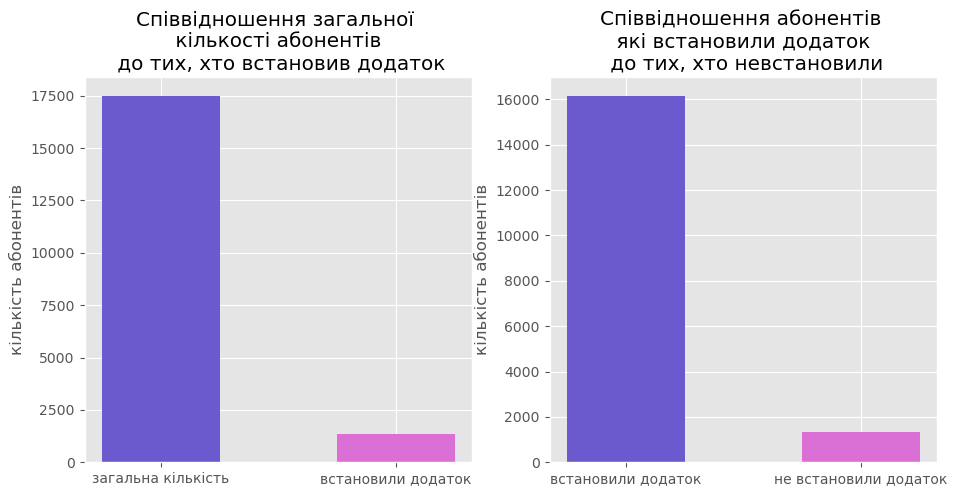

In [134]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

bar_colors = ['slateblue', 'orchid']

ax[0].bar(['загальна кількість', 'встановили додаток'], [len(df),len(target_1)], color=bar_colors, width=0.5)
ax[0].set_title('Співвідношення загальної \n кількості абонентів \n до тих, хто встановив додаток')
ax[0].set_ylabel('кількість абонентів')

ax[1].bar(['встановили додаток', 'не встановили додаток'], [len(target_0),len(target_1)], color=bar_colors, width=0.5)
ax[1].set_title('Співвідношення абонентів \n які встановили додаток \n до тих, хто невстановили')
ax[1].set_ylabel('кількість абонентів')

plt.show()

In [135]:
round(len(df[df['target']==1])*100/len(df), 1)

7.7

Кількість абонентів, які встановили музичний додаток Vodafone Music є малою величиною (1340 із 17498) і становить 7,7% від загальної кількості користувачів Vodafone

Розглянемо розподіл користувачів за типом девайсу - параметр **device_type**

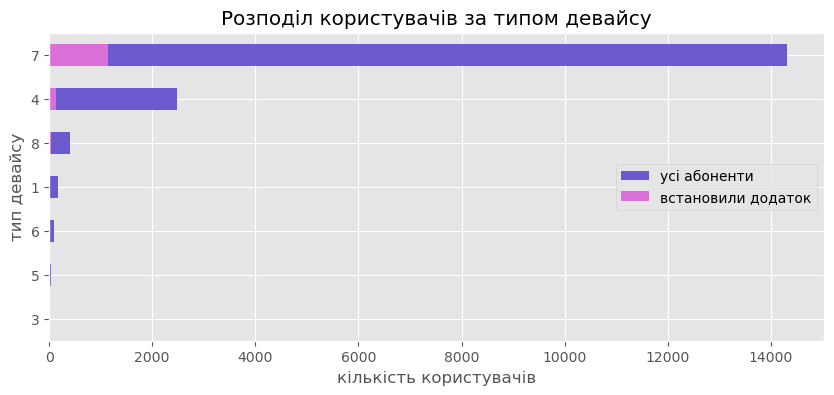

In [136]:
fig, ax = plt.subplots(figsize=(10, 4))

df['device_type'].value_counts().sort_values().plot(kind = 'barh',color='slateblue')
df.groupby('device_type')['target'].sum().sort_values().plot(kind = 'barh',color='orchid')
#df['device_type'].value_counts().sort_index().plot(kind = 'barh',color='slateblue')
#df.groupby('device_type')['target'].sum().sort_index().plot(kind = 'barh',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=7)
plt.title('Розподіл користувачів за типом девайсу')
plt.ylabel('тип девайсу')
plt.xlabel('кількість користувачів')

plt.show()


Найпопулярніший тип девайсу - 7. Встановлення музичного додатку не залежить від типу пристрою абонента

Розглянемо розподіл користувачів за категорією операційної системи пристрою

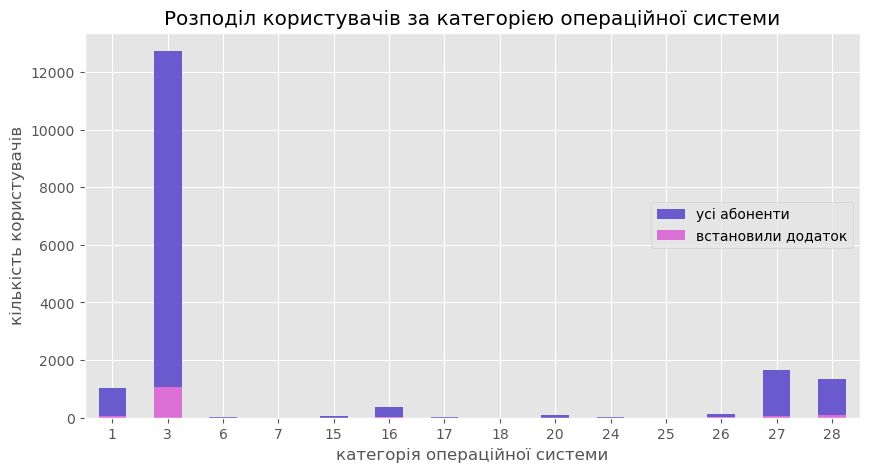

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))

df['os_category'].value_counts().sort_index().plot(kind = 'bar',color='slateblue')
df.groupby('os_category')['target'].sum().sort_index().plot(kind = 'bar',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=7)
plt.title('Розподіл користувачів за категорією операційної системи')
plt.ylabel('кількість користувачів')
plt.xlabel('категорія операційної системи')
plt.xticks(rotation=0)

plt.show()

Найпопулярніша категорія операційної системи - 3. Встановлення музичного додатку не залежить від категорії операційної системи пристрою

Розглянемо розподіл користувачів за кількістю sim-карт в пристрої

In [66]:
df['sim_count'].value_counts().sort_index()

1.0     6817
2.0    10670
3.0       11
Name: sim_count, dtype: int64

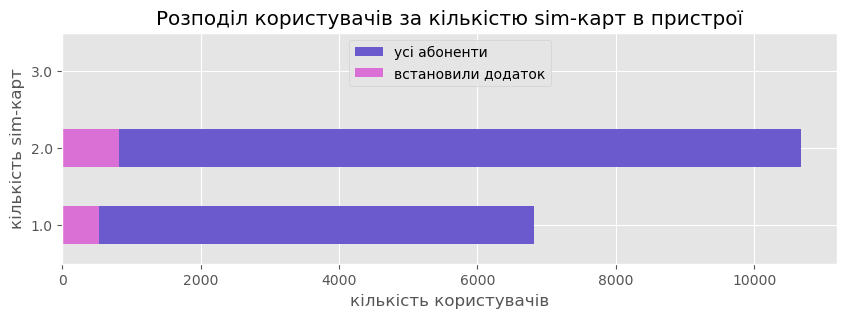

In [67]:
fig, ax = plt.subplots(figsize=(10, 3))

df['sim_count'].value_counts().sort_index().plot(kind = 'barh',color='slateblue')
df.groupby('sim_count')['target'].sum().sort_index().plot(kind = 'barh',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc='upper center')
plt.title('Розподіл користувачів за кількістю sim-карт в пристрої')
plt.ylabel('кількість sim-карт')
plt.xlabel('кількість користувачів')

plt.show()

Найбільше абоненти використовують 2 sim-карти і 1; 3 sim-карти майже не використовують. Встановлення музичного додатку не залежить від категорії операційної системи пристрою

Розглянемо розподіл користувачів за проживанням в обласному центрі або за його межами

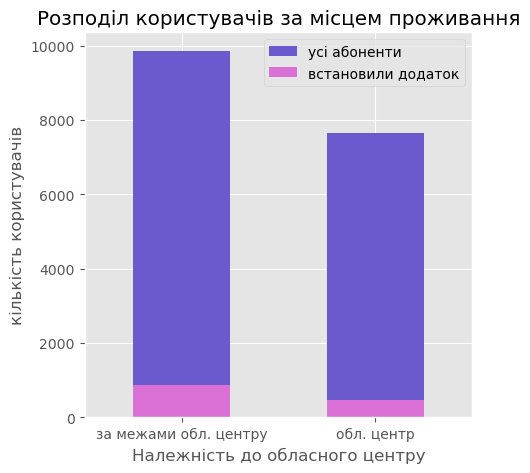

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))

df['is_obl_center'].value_counts().sort_index().plot(kind = 'bar',color='slateblue')
df.groupby('is_obl_center')['target'].sum().sort_index().plot(kind = 'bar',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=1)
plt.title('Розподіл користувачів за місцем проживання')
plt.ylabel('кількість користувачів')
plt.xlabel('Належність до обласного центру')
labels = ['за межами обл. центру', 'обл. центр']
plt.xticks([0,1], labels, rotation=0)

plt.show()

Встановлення музичного додатку не залежить від категорії операційної системи пристрою. Різниця кількості абонентів, що мешкають в області і в обласному центрі невелика. Але тих, хто проживає за обласним центром білеше і тому серед них більше абонентів, що підключили додаток.  

Розглянемо кількість абонентів, зареєстрованих в особистому кабінеті Vodafone

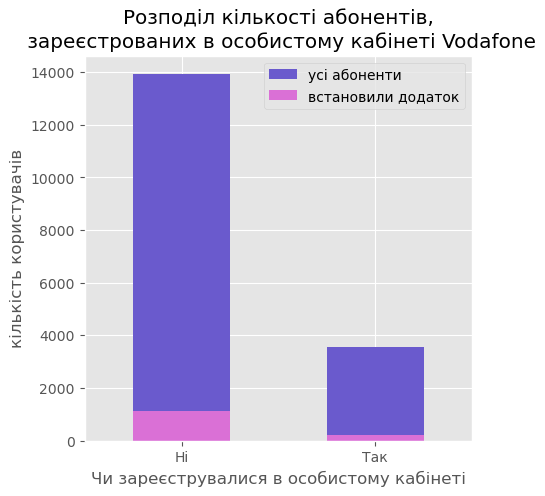

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))

df['is_my_vf'].value_counts().sort_index().plot(kind = 'bar',color='slateblue')
df.groupby('is_my_vf')['target'].sum().sort_index().plot(kind = 'bar',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=1)
plt.title('Розподіл кількості абонентів,\n зареєстрованих в особистому кабінеті Vodafone')
plt.ylabel('кількість користувачів')
plt.xlabel('Чи зареєструвалися в особистому кабінеті')
labels = ['Ні', 'Так']
plt.xticks([0,1], labels, rotation=0)

plt.show()

Встановлення музичного додатку не залежить від реєстрації абоненту в особистому кабінеті. Зареєстровані в особистому кабінеті Vodafone становлять 1/4 від зареєстрованих. Можемо зробити висновок, що використання особистого кабінету не є популярним, пропозиції для абонентів щодо різного виду послуг компанії Vodafone на сайті My_Vodafone будуть малоефективними.

Розглянемо параметр **income_brnd_cont** - дохід по вмісту бренду 

Виведемо зведену таблицю для target відносно середнього значення income_brnd_cont помісячно

In [185]:
income_brnd_cont = df.groupby('target')[['income_brnd_cont_m3','income_brnd_cont_m2','income_brnd_cont_m1']].mean()
income_brnd_cont

,income_brnd_cont_m3,income_brnd_cont_m2,income_brnd_cont_m1
target,,,
0,2.255147,2.374248,2.112274
1,4.601193,4.865006,5.323247


Візуалізуємо дану таблицю

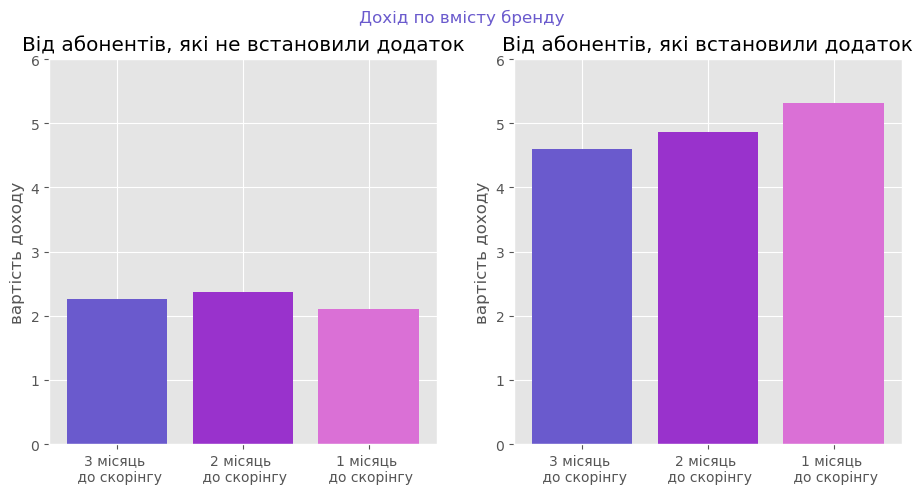

In [204]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

fig.suptitle('Дохід по вмісту бренду', color='slateblue')
bar_colors = ['slateblue', 'darkorchid','orchid']
bar_x = ['3 місяць \n до скорінгу', '2 місяць \n до скорінгу','1 місяць \n до скорінгу']

ax[0].bar(bar_x, income_brnd_cont.iloc[0], color=bar_colors)
ax[0].set_title('Від абонентів, які не встановили додаток')
ax[0].set_ylabel('вартість доходу')
ax[0].set_ylim(0, 6)

ax[1].bar(bar_x, income_brnd_cont.iloc[1], color=bar_colors)
ax[1].set_title('Від абонентів, які встановили додаток')
ax[1].set_ylabel('вартість доходу')
ax[1].set_ylim(0, 6)

plt.show()

Дохід по вмісту бренду Vodafone від абонентів, які встановили музичний додаток більший у кожному з 3-х місяців. Тобто, ті клієнти, які встановлюють додаток, більш схильні до використання ширшого кола пропозицій від бренду компанії Vodafone.

Розглянемо параметр **content_cost** - витрати абонентів на контент

Виведемо зведену таблицю для target відносно середнього значення витрат на контент (content_cost) абонентами  помісячно

In [217]:
content_cost = df.groupby('target')[['content_cost_m3','content_cost_m2','content_cost_m1']].mean()
content_cost

,content_cost_m3,content_cost_m2,content_cost_m1
target,,,
0,2.000755,1.914712,1.814747
1,3.806496,3.945689,4.264971


Візуалізуємо дану таблицю

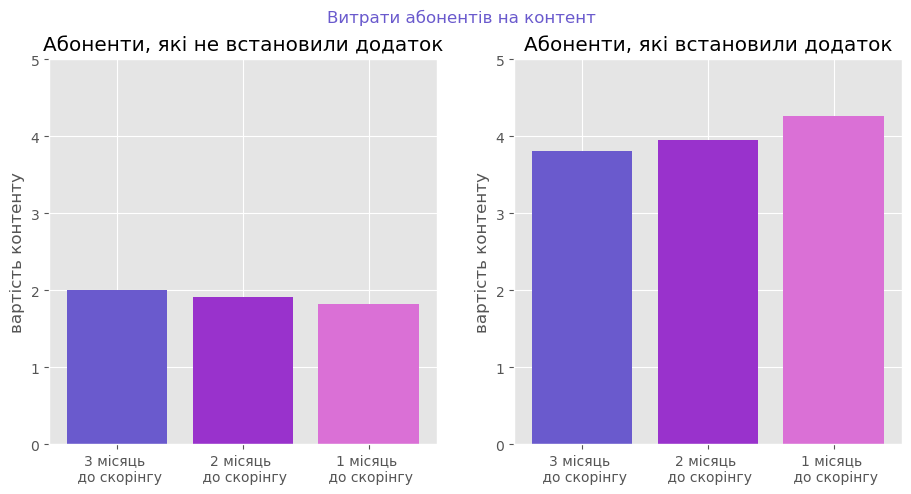

In [218]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

fig.suptitle('Витрати абонентів на контент', color='slateblue')
bar_colors = ['slateblue', 'darkorchid','orchid']
bar_x = ['3 місяць \n до скорінгу', '2 місяць \n до скорінгу','1 місяць \n до скорінгу']

ax[0].bar(bar_x, content_cost.iloc[0], color=bar_colors)
ax[0].set_title('Абоненти, які не встановили додаток')
ax[0].set_ylabel('вартість контенту')
ax[0].set_ylim(0, 5)

ax[1].bar(bar_x, content_cost.iloc[1], color=bar_colors)
ax[1].set_title('Абоненти, які встановили додаток')
ax[1].set_ylabel('вартість контенту')
ax[1].set_ylim(0, 5)

plt.show()

У абонентів Vodafone, які встановили музичний додаток, витрати на контент більші і помісячно зростають

Розглянемо параметр **content_count** - кількість використаного контенту помісячно

Виведемо зведену таблицю для target відносно середнього значення використаного контенту (content_count) абонентами  помісячно

In [239]:
content_count = df.groupby('target')[['content_count_m3','content_count_m2','content_count_m1']].mean()
content_count

,content_count_m3,content_count_m2,content_count_m1
target,,,
0,46.028469,48.608986,48.385444
1,62.436567,64.561194,70.782836


Візуалізуємо дану таблицю

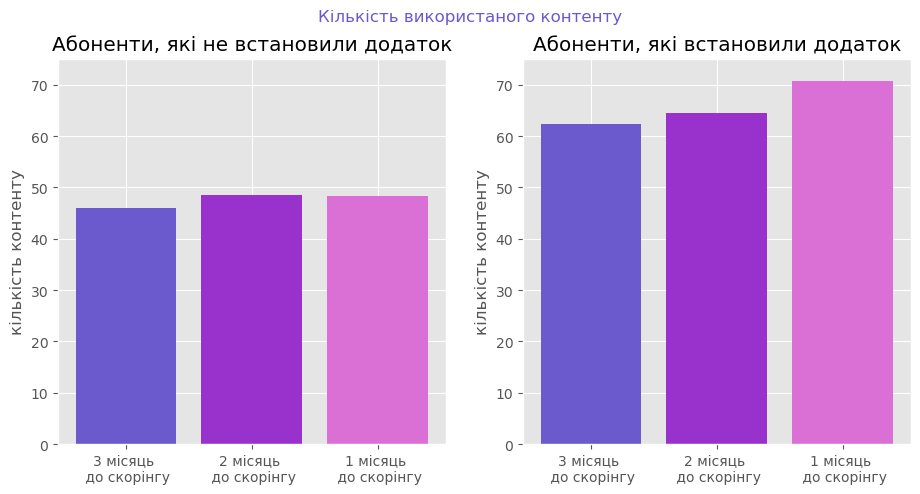

In [242]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

fig.suptitle('Кількість використаного контенту', color='slateblue')
bar_colors = ['slateblue', 'darkorchid','orchid']
bar_x = ['3 місяць \n до скорінгу', '2 місяць \n до скорінгу','1 місяць \n до скорінгу']

ax[0].bar(bar_x, content_count.iloc[0], color=bar_colors)
ax[0].set_title('Абоненти, які не встановили додаток')
ax[0].set_ylabel('кількість контенту')
ax[0].set_ylim(0, 75)

ax[1].bar(bar_x, content_count.iloc[1], color=bar_colors)
ax[1].set_title('Абоненти, які встановили додаток')
ax[1].set_ylabel('кількість контенту')
ax[1].set_ylim(0, 75)

plt.show()

Абоненти Vodafone, які встановили музичний додаток, використовують більше контенту 

Розглянемо параметр **vol_app** - кількість використаних байтів абонентами в соціальних мережах, месенджерах, додатках

In [252]:
df_vol_app = df.loc[:,'vol_app_1':'vol_app_16']
df_vol_app

,vol_app_1,vol_app_2,vol_app_3,vol_app_4,vol_app_5,vol_app_6,vol_app_7,vol_app_8,vol_app_9,vol_app_10,vol_app_11,vol_app_12,vol_app_13,vol_app_14,vol_app_15,vol_app_16
0,2189447.0,0.0,0.0,81449755.0,1.879165e+06,0.0,0.000000e+00,0.0,3345729.0,0.0,0.0,0.0,104888.0,0.0,21890124.0,0.0
1,113060461.0,0.0,0.0,12095636.0,1.322567e+08,0.0,1.069757e+07,0.0,0.0,815002.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,332958668.0,0.0,0.0,15175609.0,1.913414e+08,0.0,1.064709e+09,49488.0,0.0,5165400.0,0.0,7712.0,0.0,0.0,0.0,0.0
4,40485.0,0.0,0.0,57894.0,0.000000e+00,2924941.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,597760.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,399061960.0,0.0,0.0,5070843.0,4.892103e+07,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53141.0
17496,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17497,16033213.0,0.0,0.0,0.0,5.236665e+07,5070520.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17498,0.0,0.0,0.0,12654.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
df_vol_app.mean()

vol_app_1     1.515784e+08
vol_app_2     1.057559e+05
vol_app_3     2.362507e+05
vol_app_4     1.556740e+07
vol_app_5     6.693611e+08
vol_app_6     8.211455e+06
vol_app_7     3.463377e+08
vol_app_8     1.388831e+05
vol_app_9     4.573315e+05
vol_app_10    8.568812e+05
vol_app_11    1.649164e+05
vol_app_12    2.532389e+05
vol_app_13    6.504615e+04
vol_app_14    5.425597e+06
vol_app_15    4.548475e+06
vol_app_16    1.146115e+05
dtype: float64

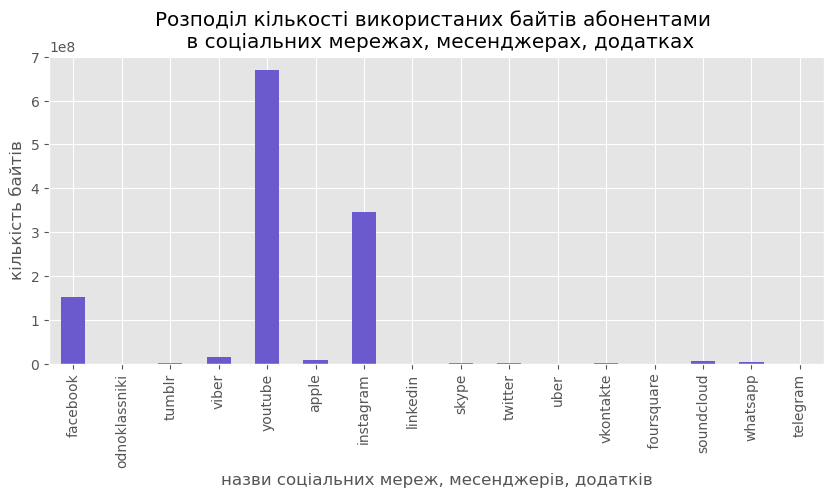

In [289]:
fig, ax = plt.subplots(figsize=(10, 4))
df_vol_app.mean().plot(kind = 'bar',color='slateblue')

ticks = []
for i in range(0, 16):
    ticks.append(i)
#ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
labels = ['facebook', 'odnoklassniki', 'tumblr', 'viber',
          'youtube', 'apple', 'instagram', 'linkedin', 'skype',
         'twitter', 'uber', 'vkontakte', ' foursquare',
          'soundcloud', 'whatsapp', 'telegram']
plt.xticks(ticks, labels, rotation='vertical')
plt.title('Розподіл кількості використаних байтів абонентами \n в соціальних мережах, месенджерах, додатках')
plt.ylabel('кількість байтів')
plt.xlabel('назви соціальних мереж, месенджерів, додатків')

plt.show()

Найбільше байтів користувачі використовують при перегляді відео на youtube, а також в telegram та facebook

Розглянемо параметр **count_app** - кількість відвідувань абонентами соціальних мереж, месенджерів, додатків

In [283]:
df_count_app = df.loc[:,'count_app_1':'count_app_16']
df_count_app

,count_app_1,count_app_2,count_app_3,count_app_4,count_app_5,count_app_6,count_app_7,count_app_8,count_app_9,count_app_10,count_app_11,count_app_12,count_app_13,count_app_14,count_app_15,count_app_16
0,107.0,0.0,0.0,447.0,143.0,0.0,0.0,0.0,176.0,0.0,0.0,0.0,11.0,0.0,260.0,0.0
1,4457.0,0.0,0.0,596.0,687.0,0.0,2252.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6965.0,0.0,0.0,323.0,893.0,0.0,15799.0,6.0,0.0,184.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,9.0,0.0,171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,5300.0,0.0,0.0,861.0,717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17497,673.0,0.0,0.0,0.0,183.0,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17498,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
df_count_app.mean()

count_app_1     1254.549549
count_app_2        2.333810
count_app_3        0.231855
count_app_4      370.126243
count_app_5      830.542291
count_app_6      262.340382
count_app_7     1196.973140
count_app_8        1.561778
count_app_9       30.933821
count_app_10      14.068408
count_app_11       2.697908
count_app_12       8.941079
count_app_13       1.592982
count_app_14      26.182078
count_app_15      45.177220
count_app_16       2.972225
dtype: float64

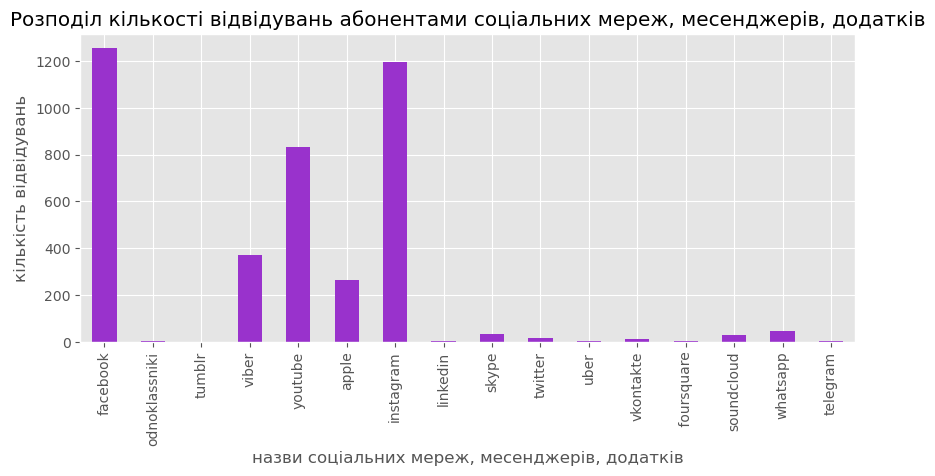

In [290]:
fig, ax = plt.subplots(figsize=(10, 4))
df_count_app.mean().plot(kind = 'bar',color='darkorchid')

ticks = []
for i in range(0, 16):
    ticks.append(i)
#ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
labels = ['facebook', 'odnoklassniki', 'tumblr', 'viber',
          'youtube', 'apple', 'instagram', 'linkedin', 'skype',
         'twitter', 'uber', 'vkontakte', ' foursquare',
          'soundcloud', 'whatsapp', 'telegram']
plt.xticks(ticks, labels, rotation='vertical')
plt.title('Розподіл кількості відвідувань абонентами соціальних мереж, месенджерів, додатків')
plt.ylabel('кількість відвідувань')
plt.xlabel('назви соціальних мереж, месенджерів, додатків')

plt.show()

В мережі facebook та telegram користувачі заходять найчастіше. 

Отже, facebook, telegram та youtube є найкращими платформами для проведення реклам та інших пропозицій від бренду Vodafone

Розглянемо параметр **count_url_category** - категорії сайтів за інтересами, які відвідують абоненти

In [291]:
df_count_url_category = df.loc[:,'count_url_category_1':'count_url_category_15']
df_count_url_category

,count_url_category_1,count_url_category_2,count_url_category_3,count_url_category_4,count_url_category_6,count_url_category_7,count_url_category_8,count_url_category_9,count_url_category_10,count_url_category_11,count_url_category_12,count_url_category_13,count_url_category_15
0,0.0,0.0,0.0,0.0,91.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,322.0,0.0,0.0,50.0,107.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17497,1281.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
df_count_url_category.mean()

count_url_category_1      5.431592
count_url_category_2     57.411190
count_url_category_3      8.832324
count_url_category_4     11.232827
count_url_category_6     10.617156
count_url_category_7     17.805406
count_url_category_8      5.454280
count_url_category_9     12.459252
count_url_category_10    39.825637
count_url_category_11     3.897988
count_url_category_12     2.132301
count_url_category_13     1.039090
count_url_category_15     0.685850
dtype: float64

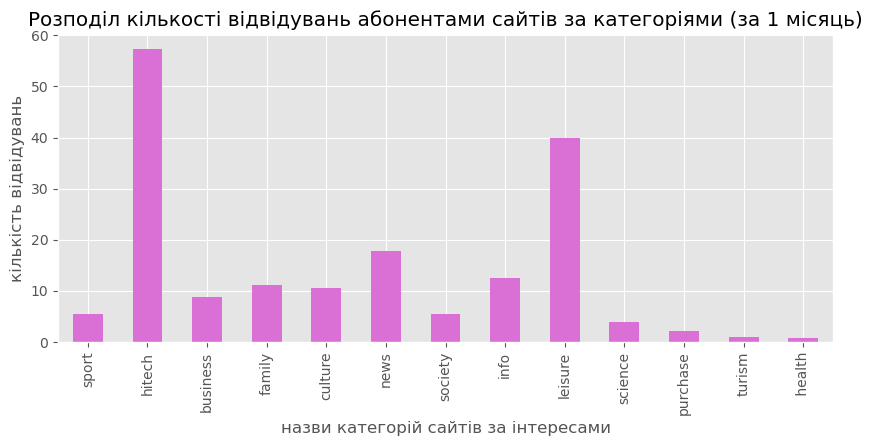

In [301]:
fig, ax = plt.subplots(figsize=(10, 4))
df_count_url_category.mean().plot(kind = 'bar',color='orchid')

ticks = []
for i in range(0, 13):
    ticks.append(i)
labels = ['sport', 'hitech', 'business', 'family',
          'culture', 'news', 'society', 'info', 'leisure',
         'science', 'purchase', 'turism', ' health']
labels2 = ['спорт', 'технології', 'бізнес', "сім'я",
          'культура', 'новини', 'суспільство', 'інфо', 'відпочинок',
         'наука', 'купівля', 'туризм', 'здоров’я']
plt.xticks(ticks, labels)
plt.title('Розподіл кількості відвідувань абонентами сайтів за категоріями (за 1 місяць)')
plt.ylabel('кількість відвідувань')
plt.xlabel('назви категорій сайтів за інтересами')

plt.show()

Найбільше користувачі заходять на сайти пов'язані з хайтеком (технологіями) та відпочинком (дозвіллям). Музичний додаток можна віднести до відпочинку - він матиме деяку популярність серед абонентів. Також, майбутні продукти від Vodafone можна пов'язати з хайтеком та дозвіллям.

Розглянемо відношення фіч **balance_sum** (сума на балансі абонента) - **lt** ( коефіцієнт довжини життя абонента в Vodafone)

In [207]:
df_balance_sum_no_emission = df[df['balance_sum']<2500]

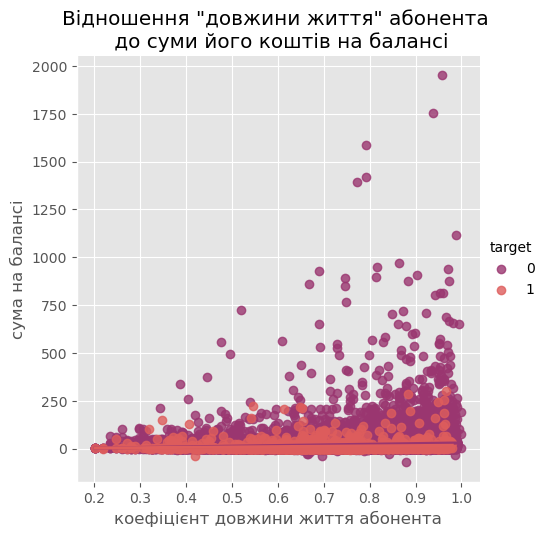

In [209]:
sns.lmplot(data=df_balance_sum_no_emission, x='lt', y='balance_sum', hue='target',palette='flare_r')

plt.title('Відношення "довжини життя" абонента \n до суми його коштів на балансі')
plt.ylabel('сума на балансі')
plt.xlabel('коефіцієнт довжини життя абонента')

plt.show()

Розіб'ємо даний графік на дві частини відносно target

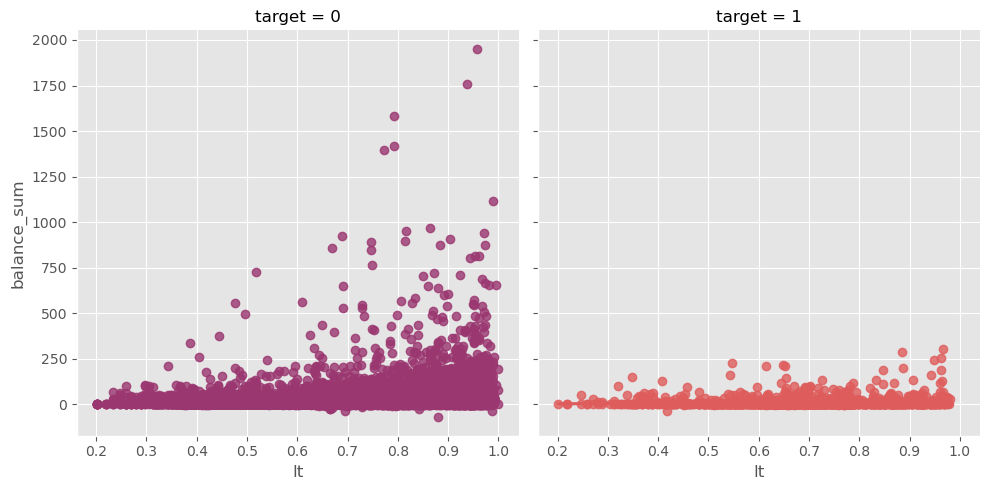

In [211]:
sns.lmplot(data=df_balance_sum_no_emission, x='lt', y='balance_sum', hue='target',palette='flare_r', col='target')

plt.show()

Згідно графіків бачимо, що чим довше абонент являється користувачем Vodafone, тим більше він схильний тримати більшу суму коштів на рахунку і не встановлювати додаток. А користувічі музичного додатку витрачають кошти швидше. 

Побудуємо гістограму розподілу "довжини життя" абонента

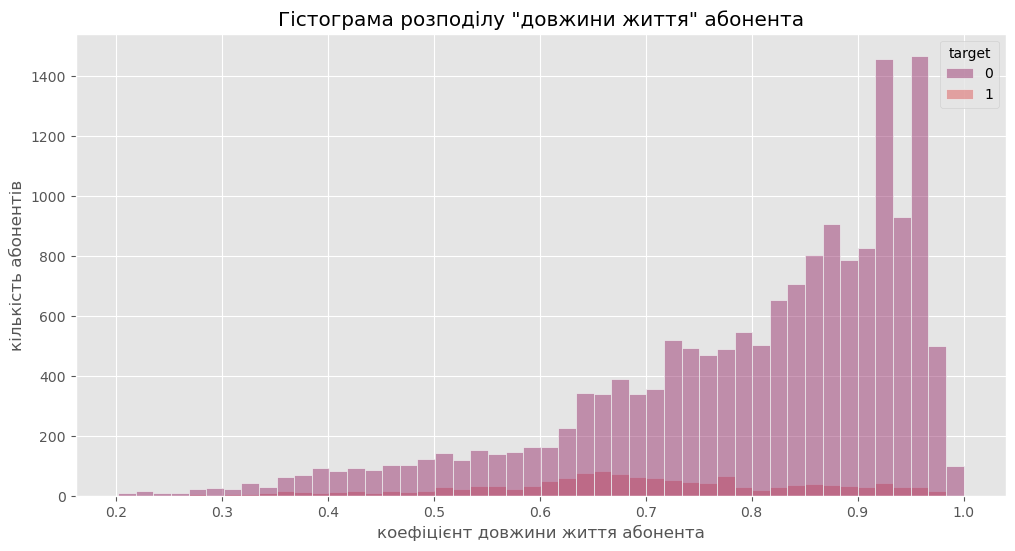

In [212]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x='lt', hue='target', palette='flare_r')

plt.title('Гістограма розподілу "довжини життя" абонента')
plt.ylabel('кількість абонентів')
plt.xlabel('коефіцієнт довжини життя абонента')

plt.show()

Гістограма показує, що більша частина абонентів є "старими" користувачами Vodafone. Також спостерігаємо, що більшість абонентів, які скористалися музичним додатком мають коефіцієнт життя від 0,8 до 0,6 - тобто користуються Vodafone більшою половиною "життя".

Розглянемо відношення фіч **paym_last_days** (кількість днів від останнього списання коштів до скорингу) - **lt** ( коефіцієнт довжини життя абонента в Vodafone)

In [196]:
df_3m = df[df['paym_last_days']<92]
df_max_m= df[df['paym_last_days']>90]

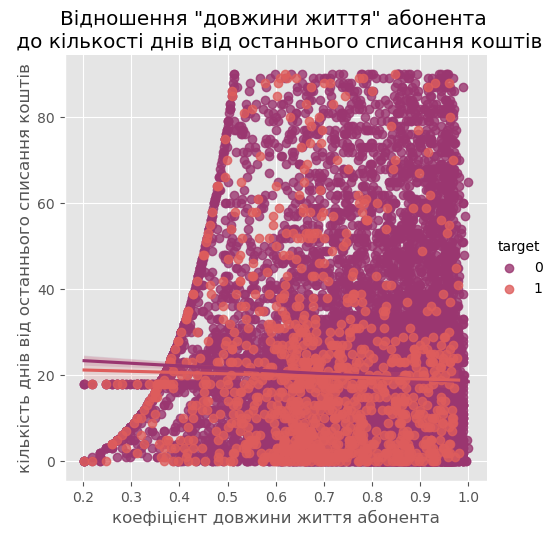

In [213]:
sns.lmplot(data=df_3m, x='lt', y='paym_last_days', hue='target',palette='flare_r')

plt.title('Відношення "довжини життя" абонента \n до кількості днів від останнього списання коштів')
plt.ylabel('кількість днів від останнього списання коштів')
plt.xlabel('коефіцієнт довжини життя абонента')

plt.show()

Спостерігаємо, що коефіцієнт довжини життя абонента обчислюється з використанням квадратичної функції. У більшості абонентів останнє списання коштів вібдулося протягом місяця (30-35 днів) до дня скорингу і саме ці абоненти в більшій кількості встановили музичний додаток.   

Розглянемо детальніше параметр **paym_last_days** - кількість днів від останнього списання коштів

In [139]:
df['paym_last_days'].value_counts().sort_index()

0.0         599
1.0         552
2.0         657
3.0         589
4.0         516
           ... 
87.0         27
88.0         22
89.0         30
90.0         28
21457.0    2261
Name: paym_last_days, Length: 92, dtype: int64

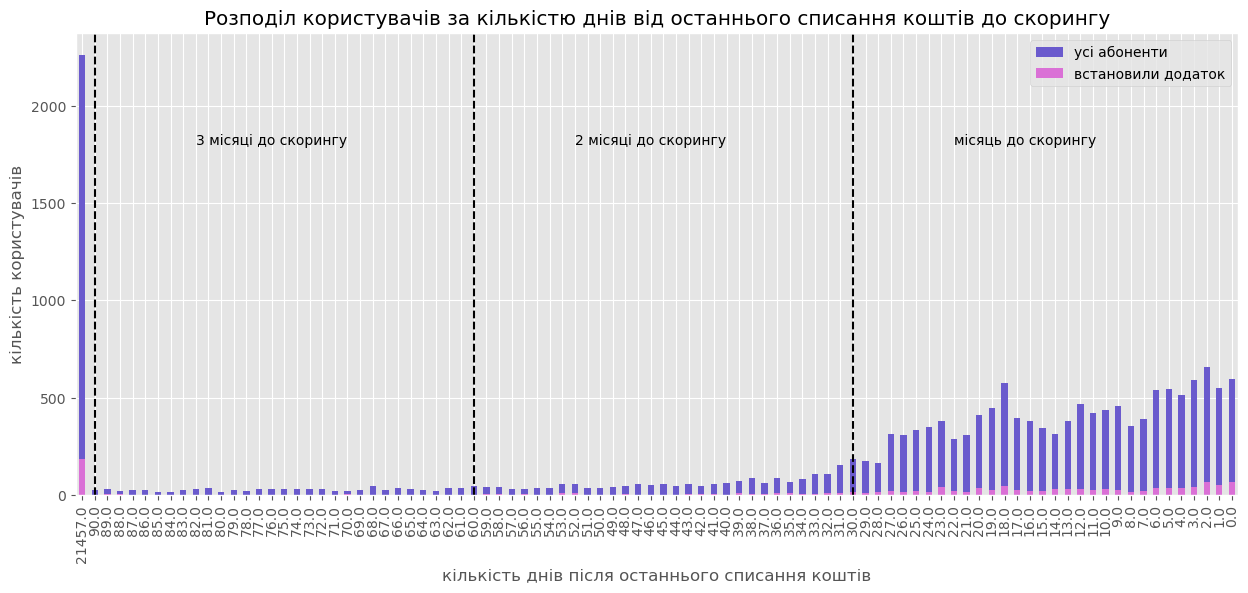

In [171]:
fig, ax = plt.subplots(figsize=(15, 6))

df['paym_last_days'].value_counts().sort_index(ascending=False).plot(kind = 'bar',color='slateblue')
#df['paym_last_days'].value_counts().sort_index(ascending=False).plot(kind = 'scatter', color='slateblue')
df.groupby('paym_last_days')['target'].sum().sort_index(ascending=False).plot(kind = 'bar',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=1)
plt.title('Розподіл користувачів за кількістю днів від останнього списання коштів до скорингу')
plt.ylabel('кількість користувачів')
plt.xlabel('кількість днів після останнього списання коштів')
plt.axvline(1, color="k", linestyle="dashed")
plt.axvline(31, color="k", linestyle="dashed")
plt.axvline(61, color="k", linestyle="dashed")
plt.text(69, 1800, 'місяць до скорингу')
plt.text(39, 1800, '2 місяці до скорингу')
plt.text(9, 1800, '3 місяці до скорингу')

plt.show()

Розіб'ємо графік на 4 групи

In [172]:
df['paym_last_days'].value_counts().sort_index()

0.0         599
1.0         552
2.0         657
3.0         589
4.0         516
           ... 
87.0         27
88.0         22
89.0         30
90.0         28
21457.0    2261
Name: paym_last_days, Length: 92, dtype: int64

In [173]:
df_paym_last_days = df['paym_last_days'].value_counts().sort_index()

paym_last_days = [round(df_paym_last_days.iloc[0:29].sum(),1), round(df_paym_last_days.iloc[30:60].sum(),1), 
                  round(df_paym_last_days.iloc[61:90].sum(),1), df_paym_last_days.iloc[-1]]
paym_last_days

[12217, 1959, 810, 2261]

In [174]:
df_paym_last_days_target = df.groupby('paym_last_days')['target'].sum().sort_index()
df_paym_last_days_target

paym_last_days
0.0         66
1.0         50
2.0         67
3.0         42
4.0         39
          ... 
87.0         2
88.0         6
89.0         5
90.0         2
21457.0    186
Name: target, Length: 92, dtype: int64

In [175]:
df_paym_last_days_target = df.groupby('paym_last_days')['target'].sum().sort_index()
df_paym_last_days_target

paym_last_days
0.0         66
1.0         50
2.0         67
3.0         42
4.0         39
          ... 
87.0         2
88.0         6
89.0         5
90.0         2
21457.0    186
Name: target, Length: 92, dtype: int64

In [176]:
paym_last_days_target = [round(df_paym_last_days_target.iloc[0:29].sum(),1), round(df_paym_last_days_target.iloc[30:60].sum(),1), 
                  round(df_paym_last_days_target.iloc[61:90].sum(),1), df_paym_last_days_target.iloc[-1]]
paym_last_days_target

[910, 172, 57, 186]

In [177]:
df_last_days = pd.DataFrame({'paym_last_days':paym_last_days, 'paym_last_days_target':paym_last_days_target}) 
df_last_days

,paym_last_days,paym_last_days_target
0,12217,910
1,1959,172
2,810,57
3,2261,186


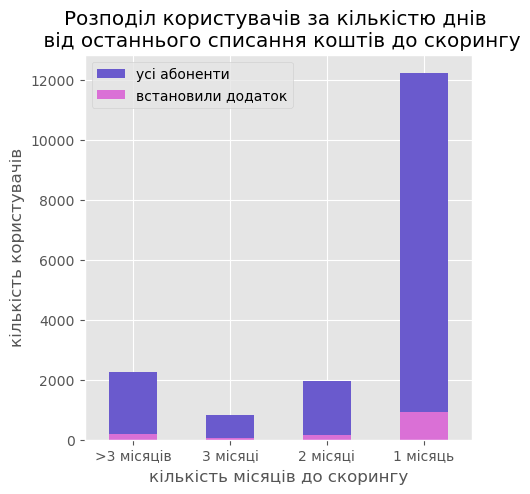

In [184]:
fig, ax = plt.subplots(figsize=(5, 5))

df_last_days['paym_last_days'].sort_index(ascending=False).plot(kind = 'bar',color='slateblue')
df_last_days['paym_last_days_target'].sort_index(ascending=False).plot(kind = 'bar',color='orchid')

plt.legend(['усі абоненти', 'встановили додаток'], loc=2)
plt.title('Розподіл користувачів за кількістю днів \n від останнього списання коштів до скорингу')
plt.ylabel('кількість користувачів')
plt.xlabel('кількість місяців до скорингу')
labels = ['>3 місяців','3 місяці', '2 місяці','1 місяць']
plt.xticks([0,1,2,3], labels, rotation=0)

plt.show()

Дані графіки ще раз підтверджують високу кількість абонентів, у яких кошти з рахунку списуються помісячно і серед них найбільший відсоток встановлення музичного додатку.

### Data Preprocessing (підготовка даних для побудови моделі)

Зробимо копію датасету

In [214]:
df_1copy = df.copy()
df_2copy = df.copy()

Переглянемо відсоток нульових значень 

In [215]:
for i in df_1copy.columns:
    percentage_columns = ((df_1copy[i]==0).sum()/len(df_1copy)*100).round(1)
    print(f'{i} :     {percentage_columns}','%')

device_type :     0.0 %
manufacturer_category :     0.0 %
os_category :     0.0 %
sim_count :     0.0 %
tp_flag :     91.8 %
lt :     0.0 %
block_flag :     97.4 %
days_exp :     0.0 %
service_1_flag :     57.9 %
service_1_count :     58.7 %
service_3_flag :     97.1 %
is_obl_center :     56.3 %
is_my_vf :     79.6 %
balance_sum :     0.0 %
paym_last_days :     3.4 %
count_sms_source_1 :     99.7 %
count_sms_source_2 :     99.9 %
count_sms_source_3 :     88.8 %
count_sms_source_4 :     58.1 %
count_sms_source_5 :     57.9 %
count_sms_source_6 :     74.3 %
count_sms_source_7 :     90.5 %
count_sms_source_8 :     96.6 %
count_sms_source_9 :     96.2 %
count_sms_source_10 :     97.2 %
count_sms_source_11 :     95.7 %
count_sms_source_12 :     98.1 %
count_sms_source_13 :     87.3 %
count_sms_source_14 :     95.6 %
count_sms_source_15 :     89.9 %
count_sms_source_16 :     98.7 %
count_url_category_1 :     97.2 %
count_url_category_2 :     52.2 %
count_url_category_3 :     89.7 %
count_url

Видалимо колонки, які мають менще 2,5% інформації

In [402]:
for i in df_1copy.columns:
    percentage_columns = ((df_1copy[i]==0).sum()/len(df_1copy)*100).round(1)
    if percentage_columns >= 97.5:
        df_1copy = df_1copy.drop(i, axis=1)

In [403]:
df_1copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17498 entries, 0 to 17499
Data columns (total 361 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    device_type                          17498 non-null  int64  
 1    manufacturer_category                17498 non-null  int64  
 2    os_category                          17498 non-null  int64  
 3    sim_count                            17498 non-null  float64
 4    tp_flag                              17498 non-null  int64  
 5    lt                                   17498 non-null  float64
 6    block_flag                           17498 non-null  int64  
 7    days_exp                             17498 non-null  float64
 8    service_1_flag                       17498 non-null  float64
 9    service_1_count                      17498 non-null  float64
 10   service_3_flag                       17498 non-null  float64
 11   is_obl_center

In [404]:
for i in df_1copy.columns:
    percentage_columns = ((df_1copy[i]==0).sum()/len(df_1copy)*100).round(1)
    print(f'{i} має 0:     {percentage_columns}','%')

device_type має 0:     0.0 %
manufacturer_category має 0:     0.0 %
os_category має 0:     0.0 %
sim_count має 0:     0.0 %
tp_flag має 0:     91.8 %
lt має 0:     0.0 %
block_flag має 0:     97.4 %
days_exp має 0:     0.0 %
service_1_flag має 0:     57.9 %
service_1_count має 0:     58.7 %
service_3_flag має 0:     97.1 %
is_obl_center має 0:     56.3 %
is_my_vf має 0:     79.6 %
balance_sum має 0:     0.0 %
paym_last_days має 0:     3.4 %
count_sms_source_3 має 0:     88.8 %
count_sms_source_4 має 0:     58.1 %
count_sms_source_5 має 0:     57.9 %
count_sms_source_6 має 0:     74.3 %
count_sms_source_7 має 0:     90.5 %
count_sms_source_8 має 0:     96.6 %
count_sms_source_9 має 0:     96.2 %
count_sms_source_10 має 0:     97.2 %
count_sms_source_11 має 0:     95.7 %
count_sms_source_13 має 0:     87.3 %
count_sms_source_14 має 0:     95.6 %
count_sms_source_15 має 0:     89.9 %
count_url_category_1 має 0:     97.2 %
count_url_category_2 має 0:     52.2 %
count_url_category_3 має 0: 

### Model Training (побудова моделі)

Розіб'ємо датасет на тестoві та трейнові дані

In [405]:
from sklearn.model_selection import train_test_split

#df_copy_model = df.copy()
X = df_1copy.drop('target', axis=1)
y = df_1copy['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

Використаємо для задачі класифікації декілька моделей 

### 1. Дерево рішень

In [410]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

tree = DecisionTreeClassifier(max_depth=5, random_state=2023)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

Середнє значення точності дерева рішень

In [411]:
tree.score(X_test, y_test)

0.9190857142857143

Матриця помилок дерева рішень

In [413]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['True_0', 'True_1'], 
             columns=['Pred_0', 'Pred_1'])

,Pred_0,Pred_1
True_0,4014,27
True_1,327,7


Основні метрики дерева рішень

In [414]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4041
           1       0.21      0.02      0.04       334

    accuracy                           0.92      4375
   macro avg       0.57      0.51      0.50      4375
weighted avg       0.87      0.92      0.89      4375



Візуалізація дерева

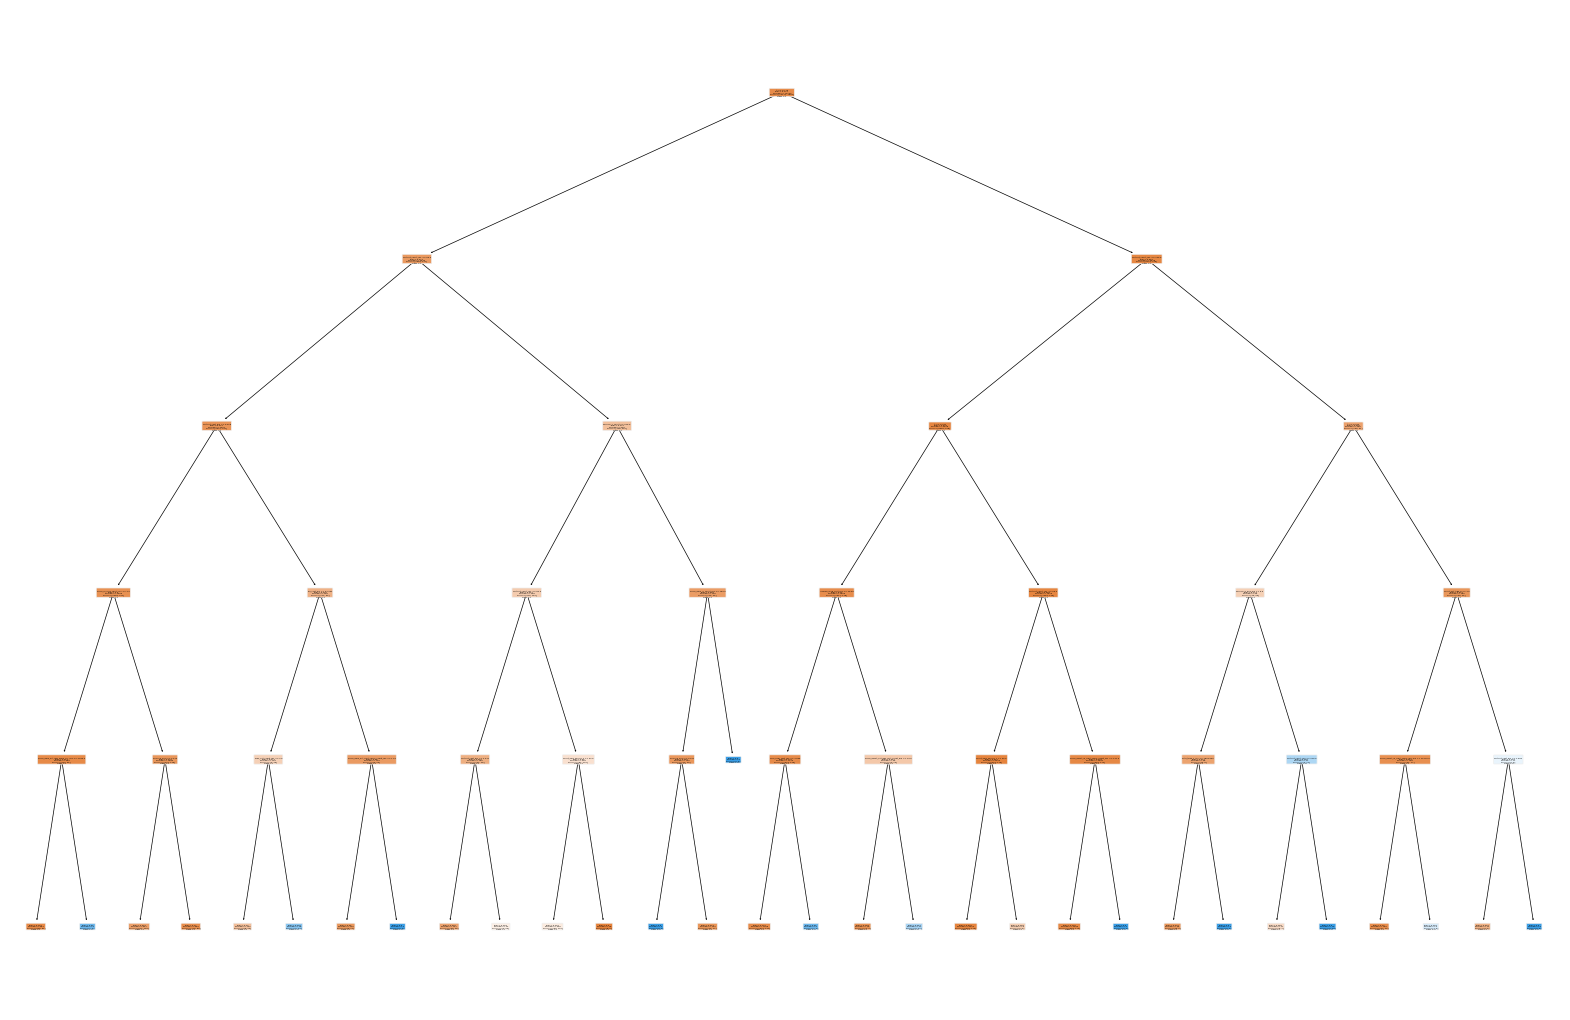

In [416]:
plt.figure(figsize=(20, 13))
plot_tree(tree,
          filled=True,
          feature_names=X.columns,
          class_names='target',
          rounded=True)
plt.show()

### 2. Логістична регресія

In [417]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Середнє значення точності логістичної регресії

In [418]:
log_reg.score(X_test, y_test)

0.9232

Матриця помилок логістичної регресії

In [427]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['True_0', 'True_1'], 
             columns=['Pred_0', 'Pred_1'])

,Pred_0,Pred_1
True_0,4039,2
True_1,334,0


Основні метрики логістичної регресії

In [428]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4041
           1       0.00      0.00      0.00       334

    accuracy                           0.92      4375
   macro avg       0.46      0.50      0.48      4375
weighted avg       0.85      0.92      0.89      4375



### 3. Градієнтний бустінг

In [431]:
from sklearn.ensemble import GradientBoostingClassifier

#gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gb = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = gb.predict(X_test)

Середнє значення точності градієнтного бустінгу

In [432]:
gb.score(X_test, y_test)

0.9213714285714286

Матриця помилок градієнтного бустінгу

In [433]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['True_0', 'True_1'], 
             columns=['Pred_0', 'Pred_1'])

,Pred_0,Pred_1
True_0,4009,32
True_1,312,22


Основні метрики градієнтного бустінгу

In [434]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4041
           1       0.41      0.07      0.11       334

    accuracy                           0.92      4375
   macro avg       0.67      0.53      0.54      4375
weighted avg       0.89      0.92      0.89      4375



Побудовані моделі бажають кращого.

Найоптимальнішим варіантом для створення моделі виявився градієнтний бустінг